## Stable Diffusion

See: https://github.com/CompVis/stable-diffusion

* Start a PyTorch notebook instance in Google Cloud Vertex AI Workbench
* Give it 4 CPUs and 1 Nvidia T4 GPU. (costs 70c/hr)
* Wait for it to start, click "Open JupyterLab"
* Git clone this repo, and run the cells in this notebook
* Change the prompt as necessary to create the images you want
* Stop the instance so that you are no longer getting charged for the GPU (only storage, a few cents/month). Delete the instance if you don't want to get charged for storage either.

In [6]:
!pip install --upgrade --quiet diffusers transformers scipy

Restart the kernel after doing the pip install above

## Get Huggingface token
* Visit https://huggingface.co/ and register for an account. You'll need it to get the weights.
* Accept the license terms for https://huggingface.co/CompVis/stable-diffusion-v1-4
* Go to https://huggingface.co/settings/profile and create a new access token for READ.  I called it stablediffusion
* Save the token to a file named token.txt in the same folder as this notebook (DO NOT CHECK THIS FILE INTO GITHUB)

In [3]:
!ls -l token.txt

-rw-r--r-- 1 jupyter jupyter 37 Sep  1 19:15 token.txt


In [4]:
with open('token.txt') as ifp:
    access_token = ifp.readline()
    print('Read a token of length {}'.format( len(access_token) ))

Read a token of length 37


## Run Stable Diffusion

In [9]:
def load_pipeline(access_token):
    import torch
    from diffusers import StableDiffusionPipeline

    model_id = "CompVis/stable-diffusion-v1-4"
    device = "cuda"

    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token=access_token)
    pipe = pipe.to(device)
    return pipe


def generate_image(pipe, prompt):
    from torch import autocast
    with autocast("cuda"):
        image = pipe(prompt.lower(), guidance_scale=7.5)["sample"][0]  

    outfilename = prompt.replace(' ', '_') + '.png'
    image.save(outfilename)
    return outfilename

In [10]:
pipeline = load_pipeline(access_token)

/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|██████████| 1.34k/1.34k [00:00<00:00, 717kB/s]
Downloading: 100%|██████████| 12.5k/12.5k [00:00<00:00, 4.78MB/s]
Downloading: 100%|██████████| 543/543 [00:00<00:00, 389kB/s]
Downloading: 100%|██████████| 4.63k/4.63k [00:00<00:00, 2.46MB/s]
Downloading: 100%|██████████| 608M/608M [00:14<00:00, 43.0MB/s] 
Downloading: 100%|██████████| 572/572 [00:00<00:00, 309kB/s]
Downloading: 100%|██████████| 246M/246M [00:05<00:00, 42.6MB/s] 
Downloading: 100%|██████████| 525k/525k [00:00<00:00, 1.22MB/s]
Downloading: 100%|██████████| 788/788 [00:00<00:00, 548kB/s]
Downloading: 100%|██████████| 1.06M/1.06M [00:00<00:00, 2.05MB/s]
Downloading: 100%|██████████| 772/772 [00:00<00:00, 606kB/s]
Downloading: 100%|██████████| 1.72G/1.72G [00:41<00:00,

51it [00:15,  3.33it/s]


A_spaceship_orbiting_earth,_digital_art,_trending_on_artstation.png


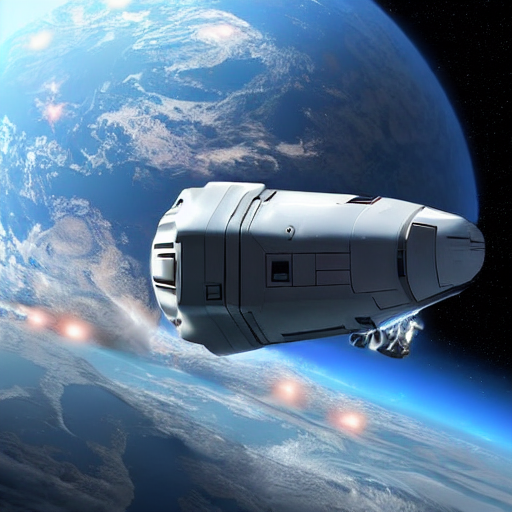

In [20]:
from IPython.display import Image

outfilename = generate_image(pipeline, prompt="A spaceship orbiting earth, digital art, trending on artstation")
print(outfilename)
Image(filename=outfilename) 

### Show the parameters of the imaging pipeline

In [19]:
def pipeline_parameters():
    from torch import autocast
    import inspect
    with autocast("cuda"):
         print(inspect.signature(pipeline))

pipeline_parameters()

(prompt: Union[str, List[str]], height: Union[int, NoneType] = 512, width: Union[int, NoneType] = 512, num_inference_steps: Union[int, NoneType] = 50, guidance_scale: Union[float, NoneType] = 7.5, eta: Union[float, NoneType] = 0.0, generator: Union[torch._C.Generator, NoneType] = None, output_type: Union[str, NoneType] = 'pil', **kwargs)
